In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Convert 'TotalCharges' to numeric (has empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop nulls
df.dropna(inplace=True)

# Drop customerID (not useful for modeling)
df.drop('customerID', axis=1, inplace=True)

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [3]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



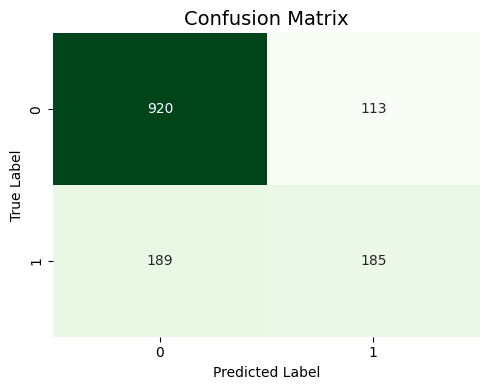

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()


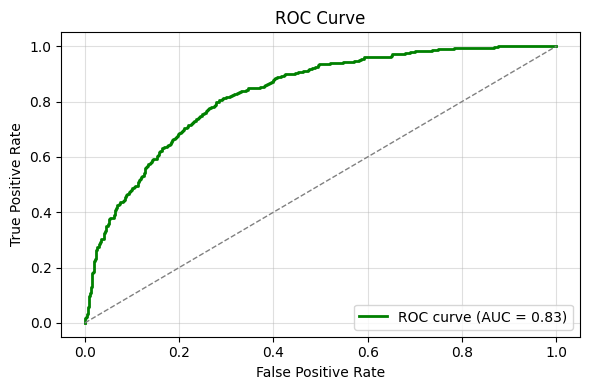

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=300)
plt.show()

C:\Users\jahna\AppData\Local\Temp\ipykernel_11028\192083521.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_risk, x='Risk_Level', palette='Greens')


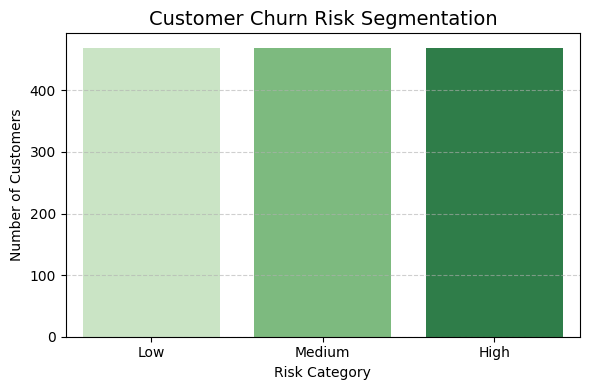

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create risk categories
df_risk = pd.DataFrame(X_test, columns=X.columns)
df_risk['Churn_Prob'] = y_prob
df_risk['Risk_Level'] = pd.qcut(df_risk['Churn_Prob'], q=3, labels=['Low', 'Medium', 'High'])

# Plot risk levels
plt.figure(figsize=(6, 4))
sns.countplot(data=df_risk, x='Risk_Level', palette='Greens')
plt.title('Customer Churn Risk Segmentation', fontsize=14)
plt.xlabel('Risk Category')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("churn_risk_segmentation.png", dpi=300)
plt.show()


C:\Users\jahna\AppData\Local\Temp\ipykernel_11028\3286321198.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[:10].values, y=importance[:10].index, palette='Greens_d')


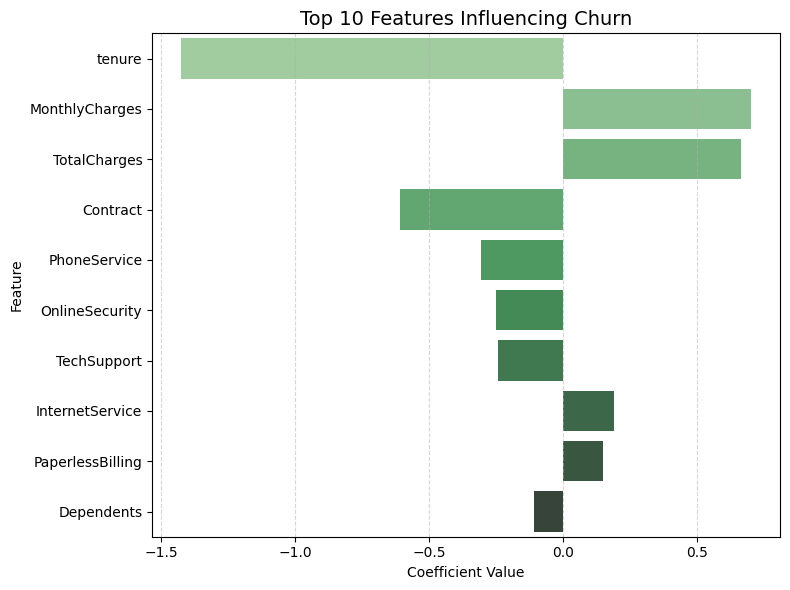

In [19]:
import numpy as np

# Assuming logistic regression model is already trained
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

# Plot top 10 features
plt.figure(figsize=(8, 6))
sns.barplot(x=importance[:10].values, y=importance[:10].index, palette='Greens_d')
plt.title('Top 10 Features Influencing Churn', fontsize=14)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.show()


In [7]:
import joblib
joblib.dump(model, 'logistic_churn_model.pkl')

['logistic_churn_model.pkl']

In [8]:
df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['Churn_Prob'] = y_prob
df_test['Risk_Level'] = pd.qcut(df_test['Churn_Prob'], q=3, labels=['Low', 'Medium', 'High'])


In [9]:
df_test.to_csv('data/churn_predictions.csv', index=False)

In [10]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Prob,Risk_Level
0,0.986404,2.285245,1.038981,-0.653684,1.168321,0.328871,1.127874,1.519150,0.239571,0.099883,...,0.233894,0.010462,-0.002012,1.573314,-1.202795,-1.491233,-1.315736,-0.341541,0.004794,Low
1,-1.013784,-0.437590,-0.962481,-0.653684,-0.543522,0.328871,1.127874,1.519150,0.239571,0.099883,...,0.233894,0.010462,-0.002012,-0.829915,-1.202795,-1.491233,-1.325680,-0.798916,0.114950,Medium
2,0.986404,-0.437590,1.038981,-0.653684,-0.788071,0.328871,1.127874,0.165345,-0.924149,-1.037445,...,-0.928346,1.142221,1.129687,-0.829915,0.831397,-0.550854,1.244647,-0.404569,0.758820,High
3,0.986404,-0.437590,1.038981,-0.653684,0.190125,0.328871,1.127874,-1.188460,1.403291,-1.037445,...,-0.928346,-1.121296,-1.133711,-0.829915,0.831397,1.329906,-0.319756,-0.107975,0.138091,Medium
4,-1.013784,-0.437590,-0.962481,-0.653684,-1.073378,-3.040707,0.072427,-1.188460,1.403291,-1.037445,...,-0.928346,-1.121296,-1.133711,-0.829915,-1.202795,-1.491233,-1.168245,-0.933316,0.342670,Medium
